# Tutorial 1: deeptb-sk baseline model

## Introduction

**DeePTB** is a method that uses deep learning to accelerate first-principles electronic structure simulations.

### Version Features
- **v1**: Constructed tight-binding (TB) models with first-principles accuracy (DeePTB-SK)
- **v2**: Added E3 equivariant networks to represent single-electron operators (Hamiltonian, density matrix, and overlap matrix) (DeePTB-E3)
- **v2.2**: Incorporated built-in SK empirical parameters covering commonly used elements across the periodic table

Through these capabilities, DeePTB provides multiple approaches to accelerate electronic structure simulations of materials.

### Learning Objectives

In this tutorial, you will:
1. Learn how to use built-in base model to plot band structure for given crystal structure
2. Learn how to generate a empirical sk model in deeptb-sk format for target system

## 1. Calculating Band Structure for a Given Structure

The deeptb-sk module now [since v2.2] has built-in empirical SK parameter models covering elements across the periodic table. 

These can be directly used to obtain empirical SKTB models for given structures. It also supports directly plotting band structures for a given structure.

In [1]:
import os
workdir='/home/mayuan/code/sctheory/DeePTB/examples/base_model'
os.chdir(f"{workdir}/structures")
!tree -L 1 ./

./
├── gaas.vasp
├── hBN.vasp
└── silicon.vasp

0 directories, 3 files


Run the band structure plotting command.
**Note** that the selection of high-symmetry paths in the Brillouin zone is based on the seekpath.get_path_orig_cell function, which has the following characteristics to be aware of:
1. It does not support 2D materials and will treat 2D materials as 3D materials
   
2. If the input cell is a non-standard primitive unit cell, the returned k path is equivalent to the k path for the standard cell. For example, the band structure calculated along the k path for the standard and non-standard unit cells will be the same up to numerical errors.
   
3. If the input cell is a supercell of a smaller primitive cell, the returned k path is that of the associated primitive cell, in the basis of supercell reciprocal lattice. In this case, the k points are not the high-symmetry points of the first Brillouin zone of the given supercell, but the high-symmetry points of the Brillouin zone of the associated primitive cell.

The command for plotting the band structure is as follows: 

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

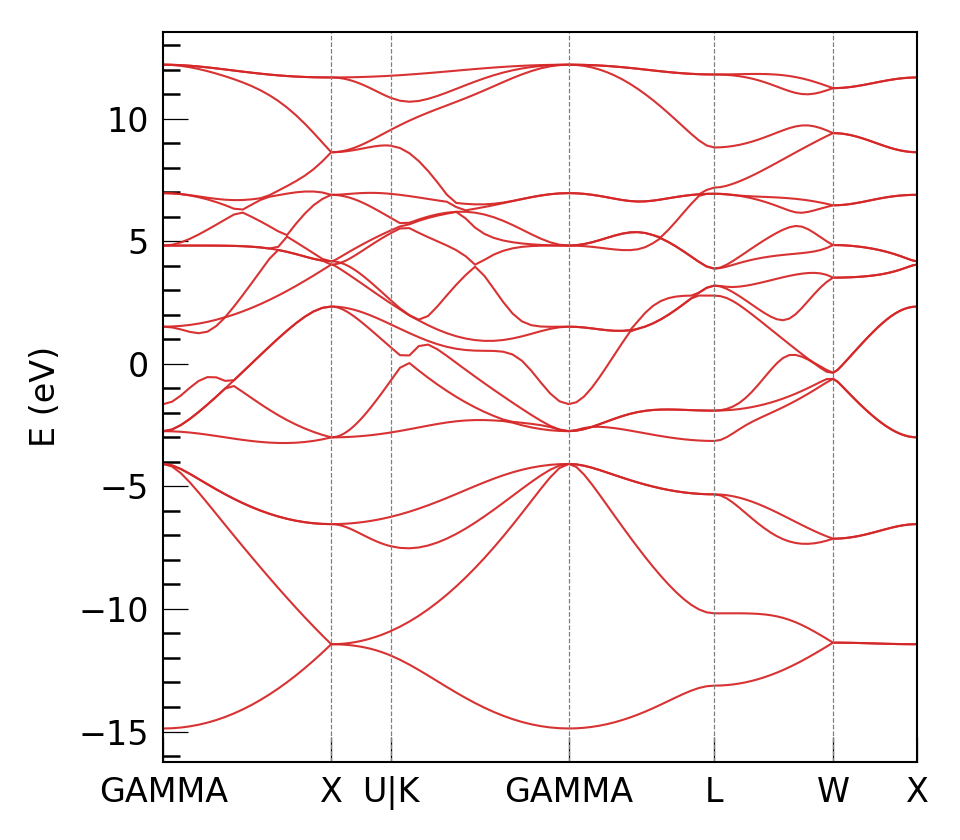

In [2]:
# 1. Silicon
!dptb run band -i poly4 -stu silicon.vasp -o band_si

# display the band plot:
from IPython.display import Image, display
import os
image_path = f'./band_si/results/band.png'
display(Image(filename=image_path))

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

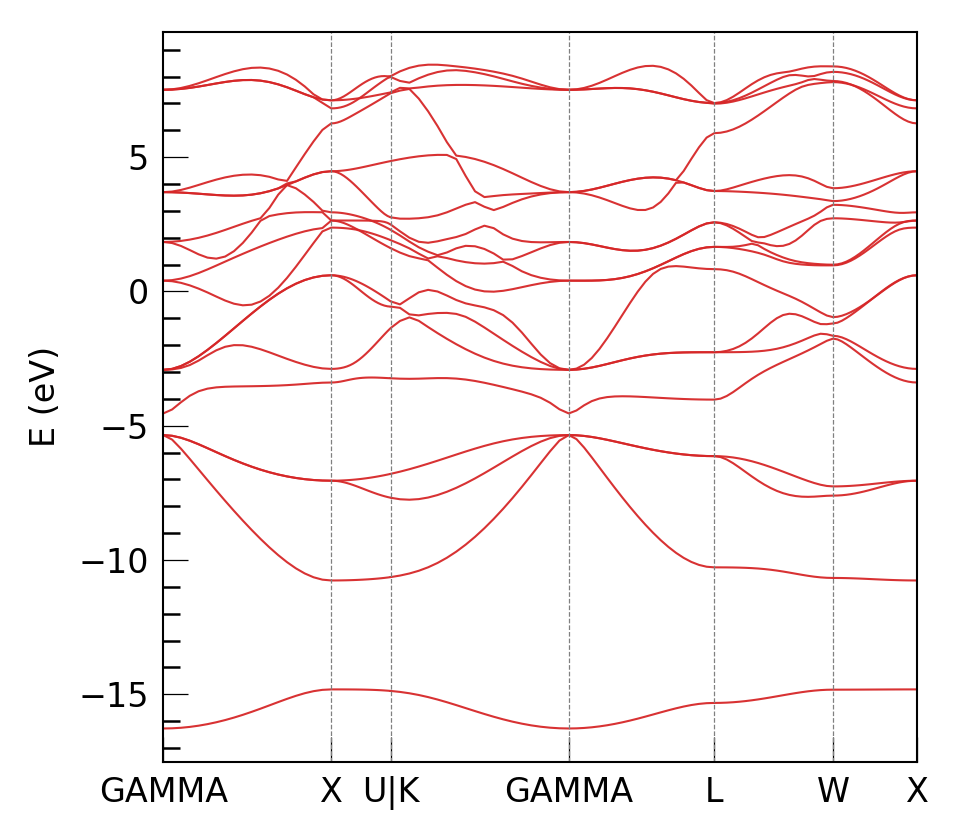

In [3]:
# 2. GaAs
!dptb run band -i poly4 -stu gaas.vasp -o band_gaas

# display the band plot:
from IPython.display import Image, display
import os
image_path = f'./band_gaas/results/band.png'
display(Image(filename=image_path))

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

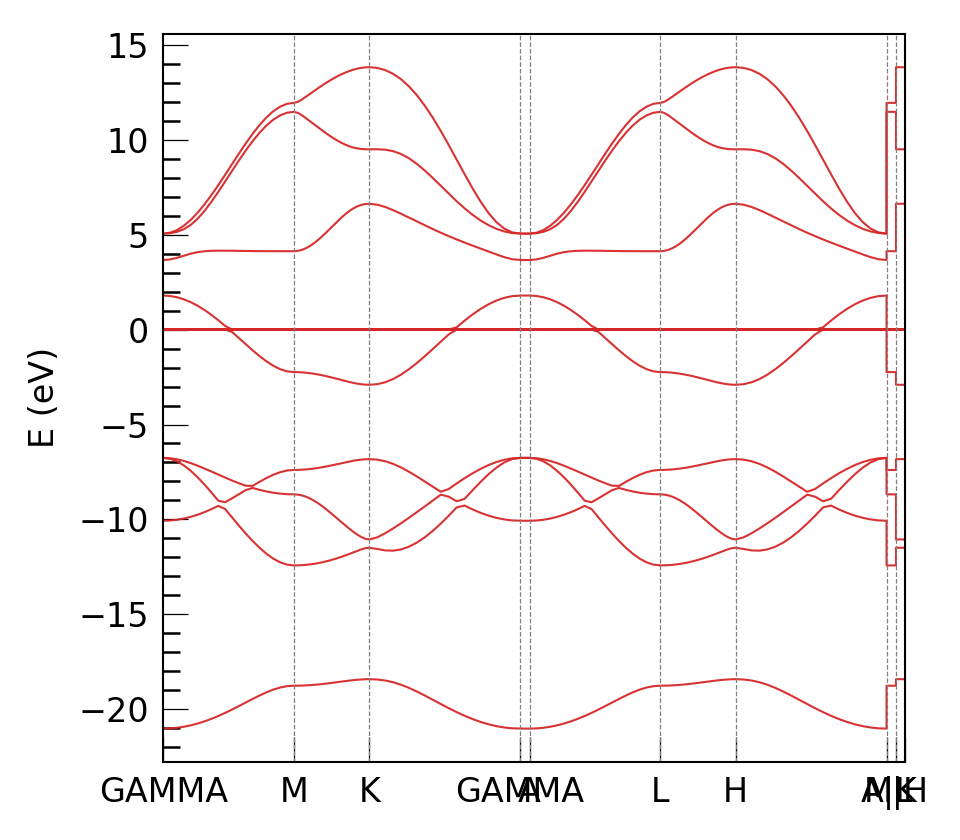

In [5]:
# 3. hBN 2D 
!dptb run band -i poly4 -stu hBN.vasp -o band_hBN

# display the band plot:
from IPython.display import Image, display
import os
image_path = f'./band_hBN/results/band.png'
display(Image(filename=image_path))

## 2. Extracting SK Parameter Files for a Given System

Since there is a built-in baseline model covering the periodic table, for the target research system, you can extract the empirical parameter model for your target system from this built-in baseline model.

In [6]:
os.chdir(f"{workdir}/confs")
!tree -L 1 ./

./
├── gaas.json
├── hbn_sp.json
├── hbn_spd.json
└── silicon.json

0 directories, 4 files


For the target system, we first need to define the basis set configuration and save it in a JSON file. Below is the configuration we use for hBN.

In [7]:
!cat hbn_spd.json

{
    "common_options": {
        "basis": {
            "B": ["s","p","d"],
            "N": ["s","p","d"]
        }
    }
}

Run the following command to extract the empirical model settings and parameters for the target system from the built-in empirical model covering the periodic table, and save them in the sktb.json file.

In [8]:
!dptb esk hbn_spd.json -m poly4 -o hbn_spd_model

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

The above command will create an hbn_spd_model folder and save the sktb.json model file in it.

In [9]:
!cat hbn_spd_model/sktb.json

{
    "version": 2,
    "unit": "eV",
    "model_options": {
        "nnsk": {
            "onsite": {
                "method": "uniform_noref"
            },
            "hopping": {
                "method": "poly4pow",
                "rs": {
                    "B-B": 4.22,
                    "B-N": 4.04,
                    "N-B": 4.04,
                    "N-N": 3.85
                },
                "w": 0.2
            },
            "soc": {},
            "freeze": false,
            "push": false,
            "std": 0.01,
            "atomic_radius": "cov"
        }
    },
    "common_options": {
        "basis": {
            "B": [
                "s",
                "p",
                "d"
            ],
            "N": [
                "s",
                "p",
                "d"
            ]
        },
        "dtype": "float32",
        "device": "cuda",
        "overlap": true
    },
    "model_params": {
        "onsite": {
            "B-s-0": [
            

We can also load the generated sktb.json model file to plot the band structure:

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

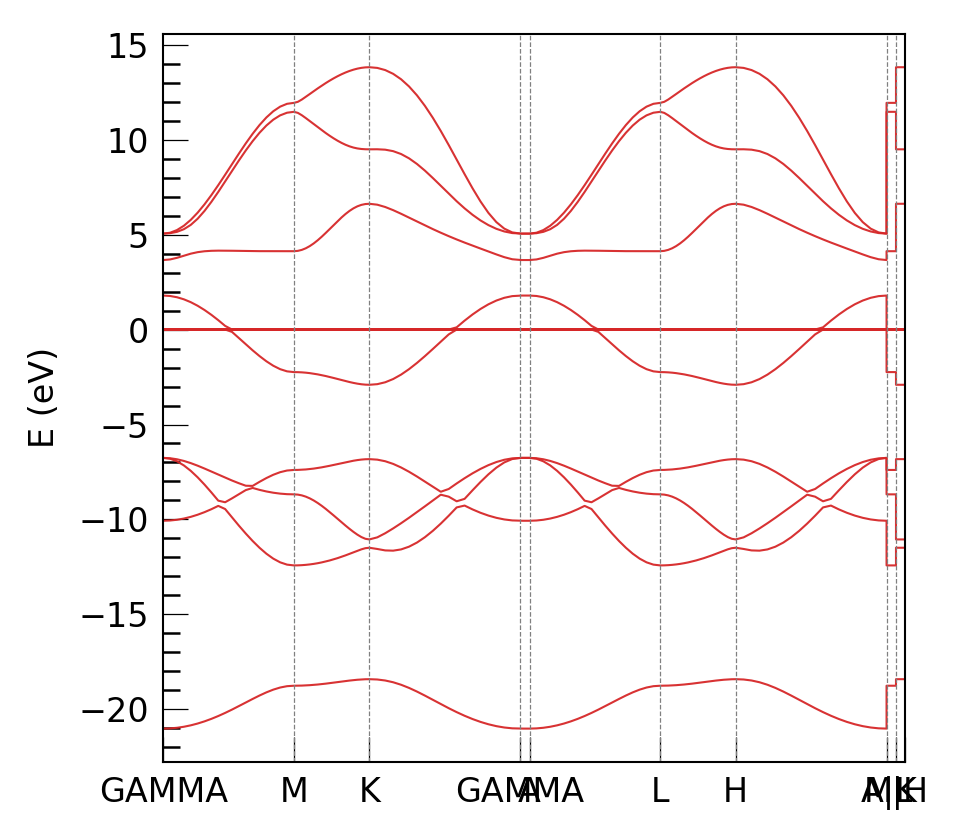

In [9]:
!dptb run band -i ./hbn_spd_model/sktb.json -stu ../structures/hBN.vasp -o band_hBN

# display the band plot:
from IPython.display import Image, display
import os
image_path = f'./band_hBN/results/band.png'
display(Image(filename=image_path))

We can see that the band structure is the same as before. 

Here we can choose different basis settings, e.g. `hbn_sp.json` as the input config:
```json
{
    "common_options": {
        "basis": {
            "B": ["s","p"],
            "N": ["s","p"]
        }
    }
}
```

In [10]:
!dptb esk hbn_sp.json -m poly4 -o hbn_sp_model

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
╭──────────────────────── Deep Learning Tight-Binding ─────────────────────────╮
│                                                                              │
│     ██████████                     ███████████  ███████████ ███████████      │
│    ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     │
│     ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     │
│     ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      │
│     ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     │
│     ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     │
│     ██████████  ░░██████ ░░██████  █████           █████    ███████████      │
│    ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       │
│                                                                              │
│                        

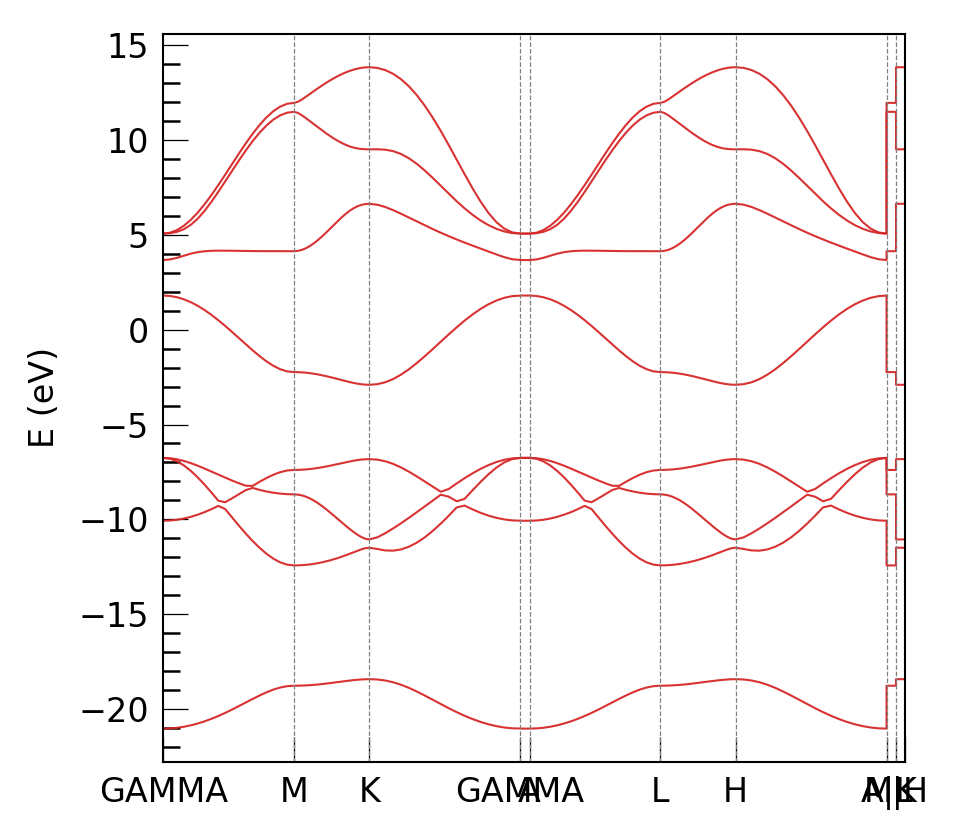

In [12]:
!dptb run band -i ./hbn_sp_model/sktb.json -stu ../structures/hBN.vasp -o band_hBN

# display the band plot:
from IPython.display import Image, display
import os
image_path = f'./band_hBN/results/band.png'
display(Image(filename=image_path))

It can be clearly seen that the bands near 0 eV are missing. This is because for the hBN system, our built-in empirical model parameters only include sp orbitals. The d orbital parameters are all set to 0 just to maintain a consistent format.

Similarly, we can obtain the corresponding model parameters for individual Si and GaAs systems. Readers are invited to explore this themselves.

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Author: <a style="font-weight:normal" href="mailto:guqq@ustc.edu.cn">Gu, Qiangqiang : guqq@ustc.edu.cn</a>
    </p>
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Thank you for reading!
    </p>
</div>